
<p>Subplot grid for plotting pairwise relationships in a dataset.

This class maps each variable in a dataset onto a column and row in a grid of multiple axes. Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.

It can also represent an additional level of conditionalization with the hue parameter, which plots different subsets of data in different colors. This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


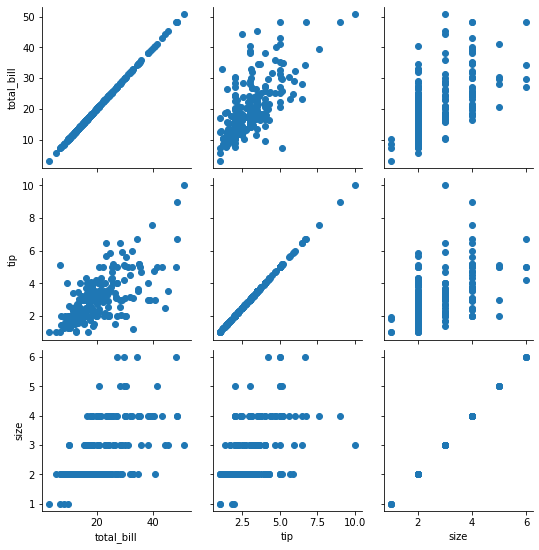

In [5]:
a = sns.PairGrid(tips)
a.map(plt.scatter)

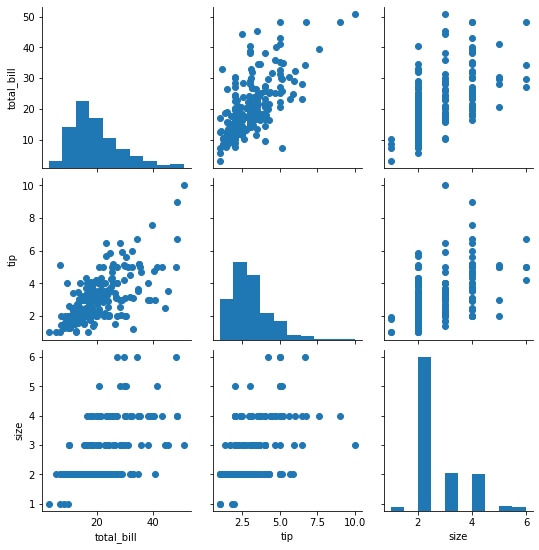

In [6]:
# Show a univariate distribution on the diagonal:

g = sns.PairGrid(tips)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)


<p>(It’s not actually necessary to catch the return value every time, as it is the same object, but it makes it easier to deal with the doctests).
</p>

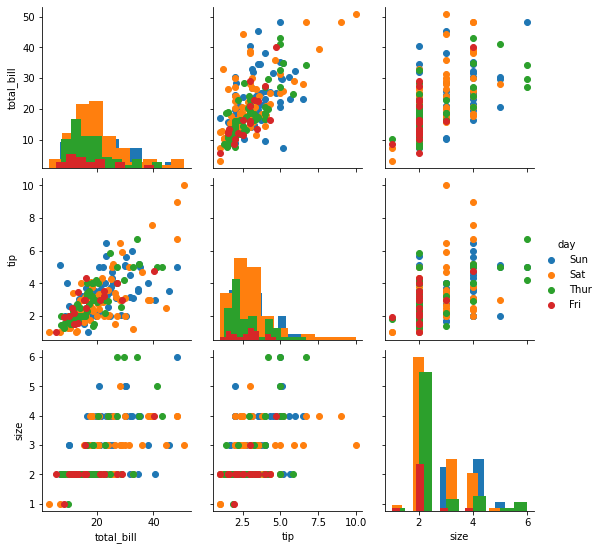

In [9]:
# Color the points using a categorical variable:

g = sns.PairGrid(tips, hue="day")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

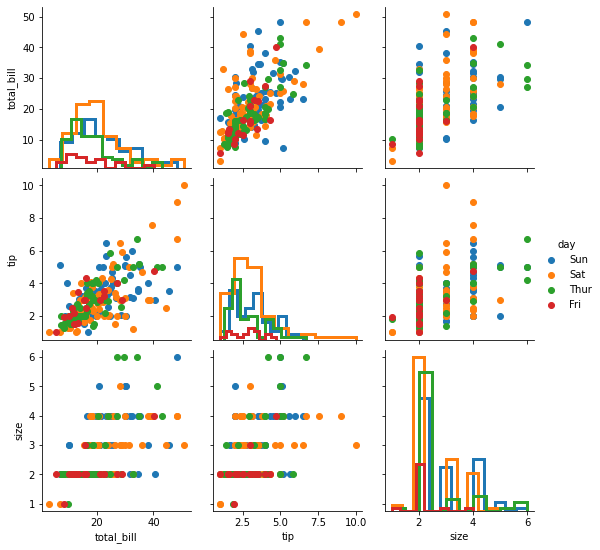

In [11]:
# Use a different style to show multiple histograms:

g = sns.PairGrid(tips, hue="day")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [12]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

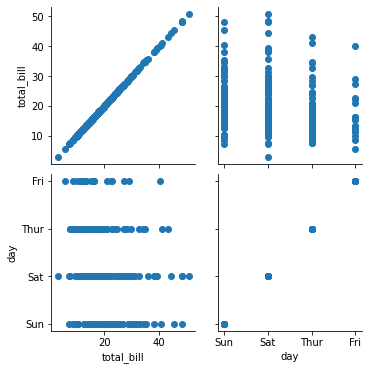

In [15]:
# Plot a subset of variables

g = sns.PairGrid(tips, vars=["total_bill", "day"])
g = g.map(plt.scatter)

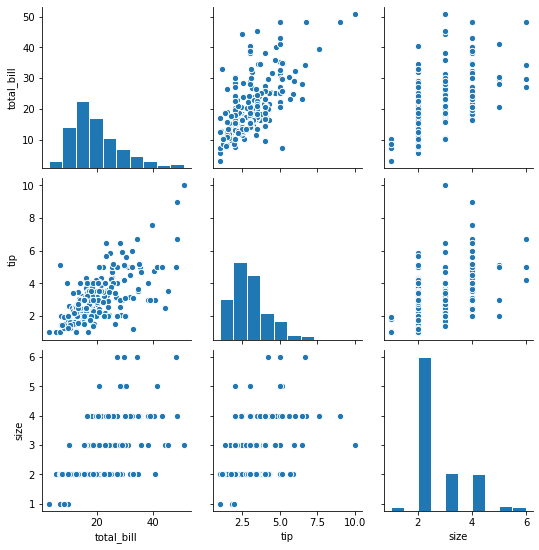

In [17]:
# Pass additional keyword arguments to the functions

g = sns.PairGrid(tips)
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)

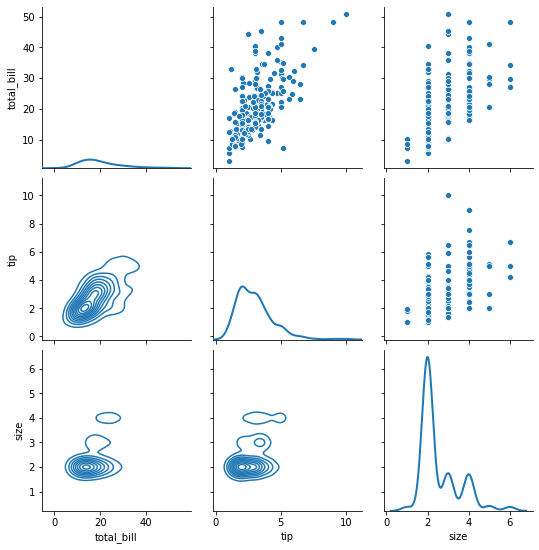

In [18]:
# Use different functions on the upper and lower triangles:

g = sns.PairGrid(tips)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, colors="C0")
g = g.map_diag(sns.kdeplot, lw=2)

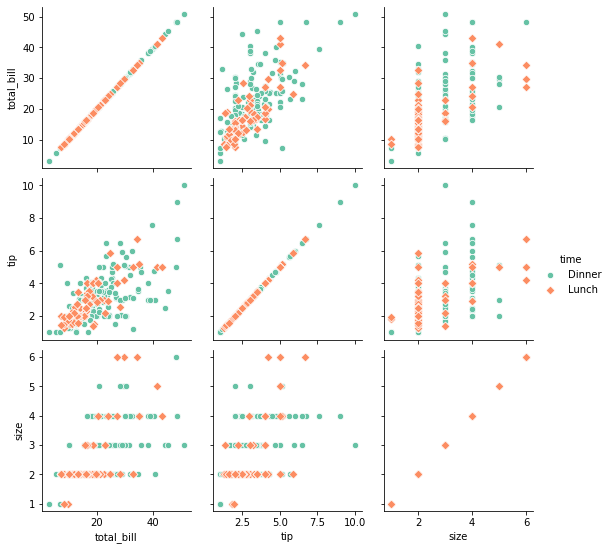

In [24]:
# Use different colors and markers for each categorical level:

g = sns.PairGrid(tips, hue="time", palette="Set2", hue_kws={"marker": ["o", "D"]})
g = g.map(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()